<h1>
    Thermodynamics of Materials AD19: <br>
    <b>Class Activity 02</b>
</h1>

<table width="75%" align="center">
    <tr>
        <th align="left" colspan="2">
            <h2><b>Team<b>:</b></h2>
        </th>
    </tr>
    <tr>
        <td><h3>Antonio Osamu Katagiri Tanaka</h3></td>
        <td><h4>A01212611@itesm.mx</h4></td>
    </tr>
    <tr>
        <td><h3>Angel Manuel Villalba Rodríguez</h3></td>
        <td><h4>A00828035@itesm.mx</h4></td>
    </tr>
</table>

<h2>S.Leharne, "<b>The physical chemistry of high-sensitivity differential scanning calorimetry of biopolymers</b>" ChemTexts (2017) 3:1</h2>

In [1]:
# PYTHON LIBRARIES
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

from scipy import special, optimize

# DATA FIG 1
data_df = pd.read_csv("./fig1_data.txt", delimiter=",");
data_df = data_df.sort_values(by=['T']);
data_T  = data_df.iloc[:]['T'];
data_c  = data_df.iloc[:]['C'];
T_1 = np.array(data_T);
C_1 = np.array(data_c);

# DATA FIG 7a
data_df = pd.read_csv("./fig7a_data.txt", delimiter=",");
data_df = data_df.sort_values(by=['T']);
data_T  = data_df.iloc[:]['T'];
data_c  = data_df.iloc[:]['C'];
T_7a = np.array(data_T);
C_7a = np.array(data_c);

# DATA FIG 11
data_df = pd.read_csv("./fig11_data.txt", delimiter=",");
data_df = data_df.sort_values(by=['T']);
data_T  = data_df.iloc[:]['T'];
data_c  = data_df.iloc[:]['C'];
T_11 = np.array(data_T);
C_11 = np.array(data_c);

Equation 21:

$$ K(T) = e^{\frac{\Delta H_{vH,ref}}{R} \left(\frac{1}{T_{ref}} - \frac{1}{T}\right) + \frac{\Delta C_P}{R} \left(ln\left(\frac{T}{T_{ref}}\right) + \frac{T_{ref}}{T} - 1\right)} $$

In [2]:
#eq 21
def K_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp):
    # x = [T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp]

    R = 8.314/1000;
    
    pwr1 = (Delta_v_ref/R)*((1/T_ref)-(1/T));
    pwr2 = (Delta_Cp/R) * (np.log(T/T_ref) + (T_ref/T) - 1);
    
    res = np.exp(pwr1 + pwr2);
    return res

Equation 18:

$$ f_D = f(T) = \frac{K(T)}{1 + K(T)} $$

In [3]:
#eq 18
def f_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp):
    
    nume = K_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp);
    deno = 1 + K_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp);
    
    res = nume/deno;
    return res;

$$ C_P = \frac{\Delta_{cal} H \Delta_{vH} H}{R T^2} f(T) (1 - f(T)) + f(T) \frac{\Delta_{cal} H_{ref}}{\Delta_{vH} H_{ref}} \Delta C_P $$

In [4]:
#eq
def C_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp):
    # x = [Delta_cal, Delta_v, T_ref, Delta_Cp]
    
    R = 8.314/1000;
    
    fact1_1 = (Delta_cal_ref * Delta_v_ref)/(R * T**2)
    fact1_2 = f_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp)
    fact1_3 = 1 - f_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp)
    sum1 = fact1_1 * fact1_2 * fact1_3
    
    fact2_1 = f_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp)
    fact2_2 = Delta_cal_ref/Delta_v_ref
    sum2 = fact2_1 * fact2_2 * Delta_Cp
    
    res = sum1 + sum2
    return res;

In [5]:
# reasonable initial guesses for EOS parameters
Delta_cal_ref = 150
Delta_v_ref = 150
T_ref = 350
Delta_Cp = 3
p0 = Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp

# PRINT table with fittig parameters
tmplt_str_l = "  ".join(["{:<15}"] + ["{:<15}"]*4);
tmplt_str_s = "  ".join(["{:<15}"] + ["{:<15.7}"]*4);
print('Fitting')
print(tmplt_str_l.format(*['parameters:', 'Delta_cal_H_ref', 'Delta_v_H_ref', 'T_ref', 'Delta_Cp']));
print("-" * 76);

# FIT FIG 1
C_prev_1 = C_(T_1, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp);
results = optimize.curve_fit(C_, T_1, C_1, p0)
C_fit_1 = C_(T_1, results[0][0], results[0][1], results[0][2], results[0][3]);
print(tmplt_str_s.format('Figure 1', *results[0], 0));

# FIT FIG 7a
C_prev_7a = C_(T_7a, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp);
results = optimize.curve_fit(C_, T_7a, C_7a, p0)
C_fit_7a = C_(T_7a, results[0][0], results[0][1], results[0][2], results[0][3]);
print(tmplt_str_s.format('Figure 7a', *results[0], 0));

# FIT FIG 11
C_prev_11 = C_(T_11, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp);
results = optimize.curve_fit(C_, T_11, C_11, p0)
C_fit_11 = C_(T_11, results[0][0], results[0][1], results[0][2], results[0][3]);
print(tmplt_str_s.format('Figure 11', *results[0], 0));

Fitting
parameters:      Delta_cal_H_ref  Delta_v_H_ref    T_ref            Delta_Cp       
----------------------------------------------------------------------------
Figure 1         195.9418         219.8923         330.2103         3.333809       
Figure 7a        505.3591         343.8411         332.1958         14.64675       
Figure 11        540.9505         222.163          324.601          1.420912       


<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

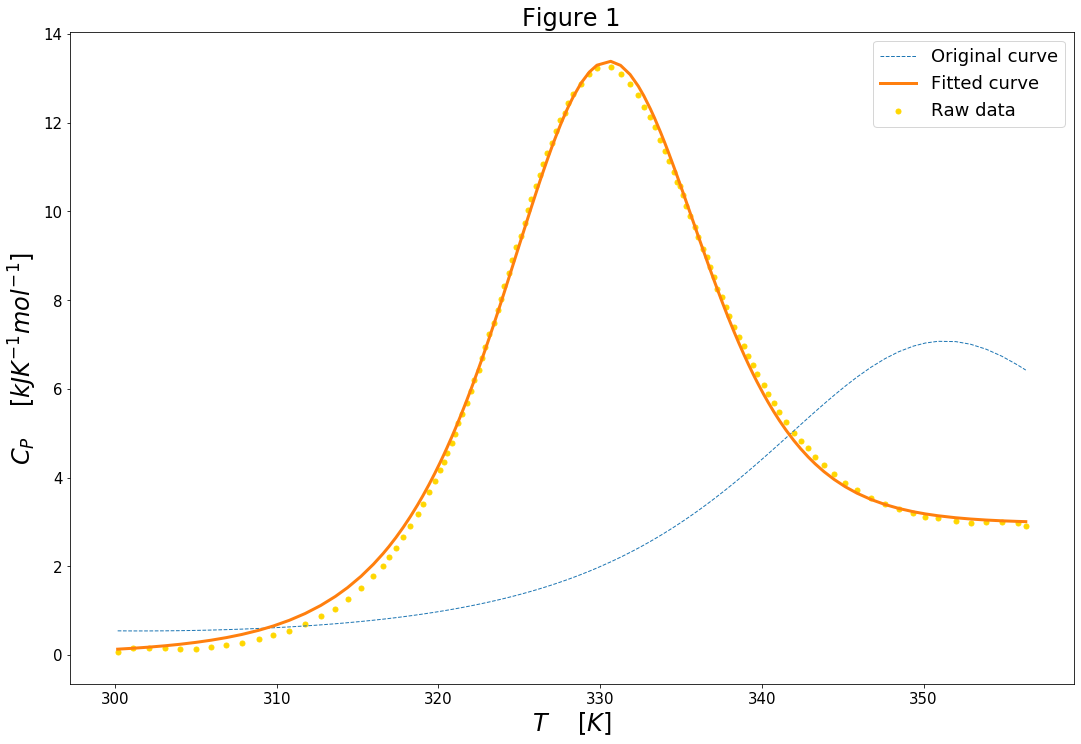

In [6]:
# PLOT FIG 1
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Plot
plt.plot(T_1, C_prev_1, '--', linewidth=1, label='Original curve')
plt.plot(T_1, C_fit_1, '-', linewidth=3, label='Fitted curve')
plt.scatter(T_1, C_1, s=25, color='gold', label='Raw data');

# Display plots
plt.yscale('linear');
plt.xlabel(r'$T$' + '    ' + r'$[K]$', fontsize=24);
plt.ylabel(r'$C_P$' + '    ' + r'$[kJ K^{-1} mol^{-1}]$', fontsize=24);
plt.title('Figure 1', size=24);
plt.legend(prop={'size': 18});
display(plt);

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

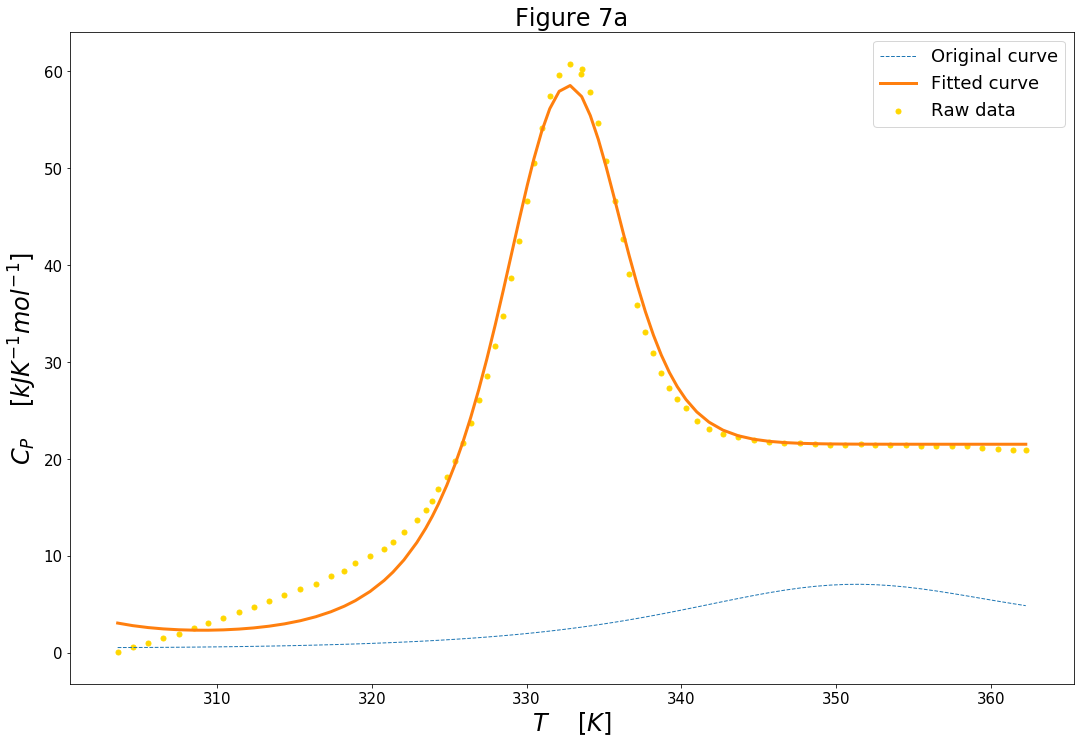

In [7]:
# PLOT FIG 7a
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Plot
plt.plot(T_7a, C_prev_7a, '--', linewidth=1, label='Original curve')
plt.plot(T_7a, C_fit_7a, '-', linewidth=3, label='Fitted curve')
plt.scatter(T_7a, C_7a, s=25, color='gold', label='Raw data');

# Display plots
plt.yscale('linear');
plt.xlabel(r'$T$' + '    ' + r'$[K]$', fontsize=24);
plt.ylabel(r'$C_P$' + '    ' + r'$[kJ K^{-1} mol^{-1}]$', fontsize=24);
plt.title('Figure 7a', size=24);
plt.legend(prop={'size': 18});
display(plt);

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

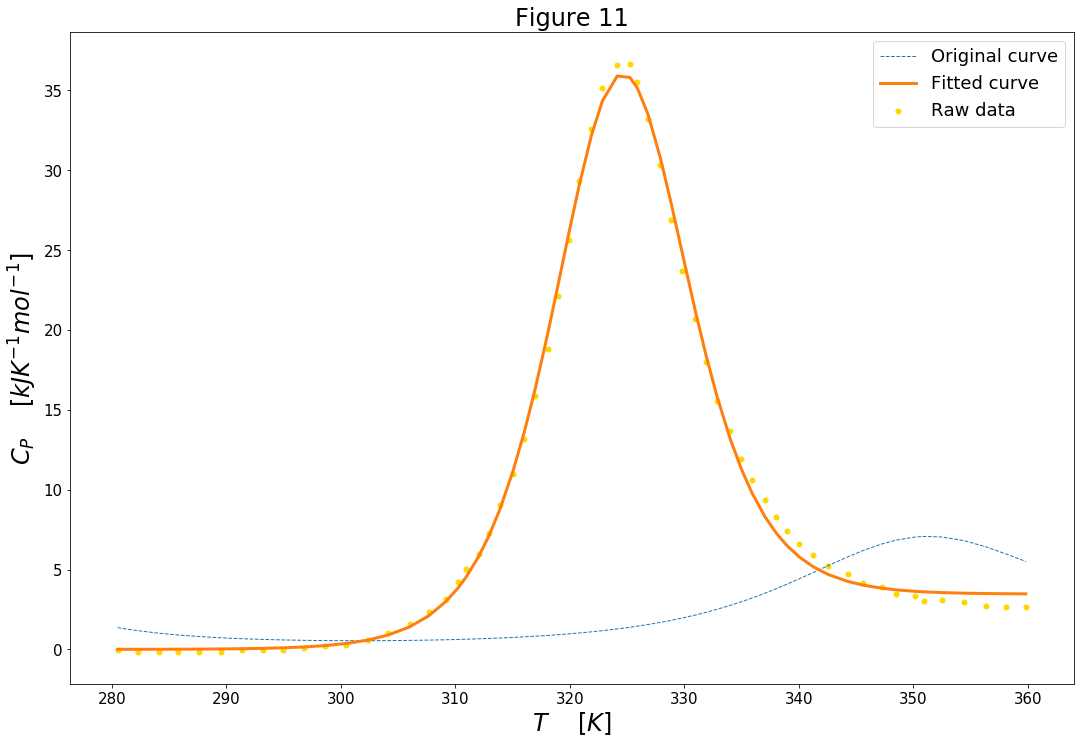

In [8]:
# PLOT FIG 11
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Plot
plt.plot(T_11, C_prev_11, '--', linewidth=1, label='Original curve')
plt.plot(T_11, C_fit_11, '-', linewidth=3, label='Fitted curve')
plt.scatter(T_11, C_11, s=25, color='gold', label='Raw data');

# Display plots
plt.yscale('linear');
plt.xlabel(r'$T$' + '    ' + r'$[K]$', fontsize=24);
plt.ylabel(r'$C_P$' + '    ' + r'$[kJ K^{-1} mol^{-1}]$', fontsize=24);
plt.title('Figure 11', size=24);
plt.legend(prop={'size': 18});
display(plt);